# Implementation of Metropolis Hastings Sampling Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm

In [2]:
# Defining Normal distribution class with sampling, pdf and log probability functionalities.
class Normal():
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def sample(self, length=1):
        x = np.random.uniform(0,1,[2, length])
        #Box-Müller method
        z = np.sqrt(-2*np.log(x[0]))*np.cos(2*np.pi*x[1])
        return z * self.sigma**2 + self.mu
    
    def pdf(self, data):
        return np.exp(-(data-self.mu)**2/(2*self.sigma**2))/np.sqrt(2*np.pi*self.sigma**2)
    
    def logp(self, data):
        #log probability function
        return -(data-self.mu)**2/(2*self.sigma**2) - 0.5*np.log(2*np.pi*self.sigma**2)

In [3]:
# defining Metropolis Hastings Sampler which takes in the data, prior distribution, proposal width(sigma) 
def sampler(data, mu_init, sigma, draws, prior_dist):
    mu_current=mu_init
    posterior = [float(mu_current)]
    with tqdm(total=draws) as pbar:
        for i in range(draws):
            mu_proposed = Normal(mu_current, sigma).sample()

            #log likelihoods for acceptance
            
            # the numerator
            log_proposal = Normal(mu_proposed, sigma).logp(data).sum() + prior_dist.logp(mu_proposed)
            
            # the denominator
            log_current = Normal(mu_current, sigma).logp(data).sum() + prior_dist.logp(mu_current)

            # log acceptance probability
            log_accept = min(0, log_proposal - log_current)

            # condition for accepting proposed mu
            if np.log(np.random.rand()) < log_accept:
                mu_current = mu_proposed

            posterior.append(float(mu_current))
            pbar.update(1)
    
    return posterior

In [4]:
# Generating Data
data = Normal().sample(1000)

In [5]:
# defining prior mu distribution
mu = Normal()

# sampling the postrior
post = sampler(data=data, mu_init=-1, sigma=0.5, draws=15000, prior_dist=mu)

100%|██████████| 15000/15000 [00:01<00:00, 14136.19it/s]


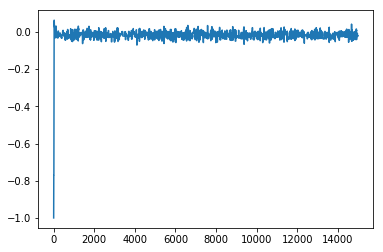

In [6]:
plt.plot(post)

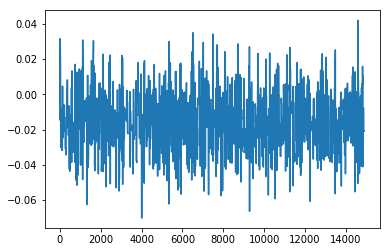

In [7]:
plt.plot(post[100:])

/home/sharan/anaconda3/envs/pymc3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'frequency'), Text(0.5,0,'mu')]

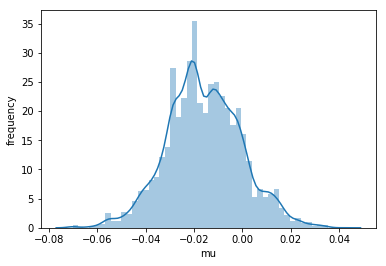

In [8]:
fig = sns.distplot(post[100:])
fig.set(xlabel='mu', ylabel='frequency')